# 1

## imports

In [1]:
import torch
import torchvision
from fastai.data.all import *
import matplotlib.pyplot as plt

In [2]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }');

In [3]:
#hide
graphviz.set_jupyter_format('png')

'svg'

## 시벤코정리

### 지난시간 논리전개

`-` 아이디어: linear -> relu -> linear (-> sigmoid) 조합으로 꺽은선으로 표현되는 underlying 을 표현할 수 있었다. 
- 아이디어의 실용성: 실제자료에서 꺽은선으로 표현되는 underlying은 몇개 없을 것 같음. 그건 맞는데 꺽이는 점을 많이 설정하면 얼추 비슷하게는 "근사" 시킬 수 있음. 
- 아이디어의 확장성: 이러한 논리전개는 X:(n,2)인 경우도 가능했음. (이 경우 꺽인선은 꺽인평면이 된다)
- 아이디어에 해당하는 용어정리: 이 구조가 x->y 로 바로 가는 것이 아니라 x->(u1->v1)->(u2->v2)=y 의 구조인데 이러한 네트워크를 하나의 은닉층을 포함하는 네트워크라고 표현한다. (이 용어는 이따가..)

### 시벤코정리

**universal approximation thm: (범용근사정리,보편근사정리,시벤코정리)**, 1989

> 하나의 은닉층을 가지는 "linear -> sigmoid -> linear" 꼴의 네트워크를 이용하여 세상에 존재하는 모든 (다차원) 연속함수를 원하는 정확도로 근사시킬 수 있다. (계수를 잘 추정한다면)


`-` 사실 엄청 이해안되는 정리임. 왜냐햐면,
- 그렇게 잘 맞추면 1989년에 세상의 모든 문제를 다 풀어야 한거 아니야? 
- 요즘은 "linear -> sigmoid -> linear" 가 아니라 "linear -> relu -> linear" 조합으로 많이 쓰던데? 
- 요즘은 하나의 은닉층을 포함하는 네트워크는 잘 안쓰지 않나? 은닉층이 여러개일수록 좋다고 어디서 본 것 같은데?

`-` 약간의 의구심이 있지만 아무튼 universal approximation thm에 따르면 우리는 아래와 같은 무기를 가진 꼴이 된다. 
- 우리의 무기: ${\bf X}: (n,p)$ 꼴의 입력에서 ${\bf y}:(n,1)$ 꼴의 출력으로 향하는 맵핑을 "linear -> relu -> linear"와 같은 네트워크를 이용해서 "근사"시킬 수 있다.

## 시벤코정리 proof

### 그림으로 보는 증명과정 

`-` 데이터

In [572]:
x = torch.linspace(-10,10,200).reshape(-1,1)

`-` 아래와 같은 네트워크를 고려하자. 

In [573]:
l1 = torch.nn.Linear(in_features=1,out_features=2)
a1 = torch.nn.Sigmoid()
l2 = torch.nn.Linear(in_features=2,out_features=1)

`-` 직관1: $l_1$,$l_2$의 가중치를 잘 결합하다보면 우연히 아래와 같이 만들 수 있다. 

In [574]:
l1.weight.data = torch.tensor([[-5.00],[5.00]])
l1.bias.data = torch.tensor([+10.00,+10.00])

In [575]:
l2.weight.data = torch.tensor([[1.00,1.00]])
l2.bias.data = torch.tensor([-1.00])

Text(0.5, 1.0, '$(l_2 \\circ a_1 \\circ \\l_1)(x)$')

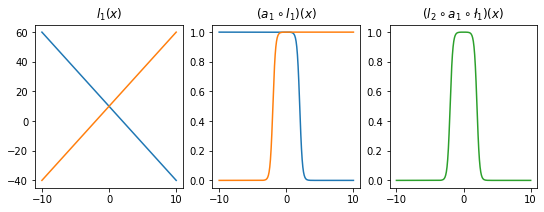

In [576]:
fig,ax = plt.subplots(1,3,figsize=(9,3))
ax[0].plot(x,l1(x).data); ax[0].set_title('$l_1(x)$')
ax[1].plot(x,a1(l1(x)).data); ax[1].set_title('$(a_1 \circ l_1)(x)$')
ax[2].plot(x,l2(a1(l1(x))).data,color='C2'); ax[2].set_title('$(l_2 \circ a_1 \circ \l_1)(x)$')

`-` 직관2: 아래들도 가능할듯? 

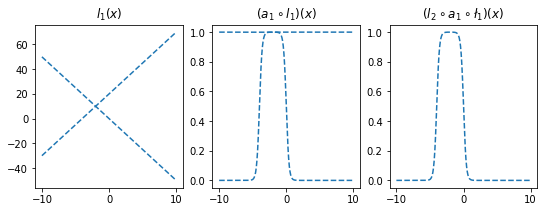

In [577]:
l1.weight.data = torch.tensor([[-5.00],[5.00]])
l1.bias.data = torch.tensor([+0.00,+20.00])
l2.weight.data = torch.tensor([[1.00,1.00]])
l2.bias.data = torch.tensor([-1.00])
fig,ax = plt.subplots(1,3,figsize=(9,3))
ax[0].plot(x,l1(x).data,'--',color='C0'); ax[0].set_title('$l_1(x)$')
ax[1].plot(x,a1(l1(x)).data,'--',color='C0'); ax[1].set_title('$(a_1 \circ l_1)(x)$')
ax[2].plot(x,l2(a1(l1(x))).data,'--',color='C0'); ax[2].set_title('$(l_2 \circ a_1 \circ \l_1)(x)$');

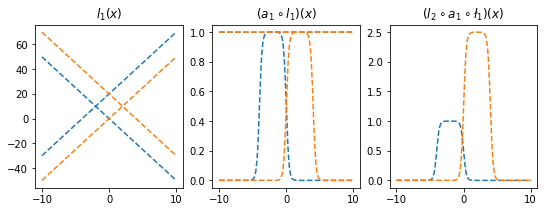

In [578]:
l1.weight.data = torch.tensor([[-5.00],[5.00]])
l1.bias.data = torch.tensor([+20.00,+0.00])
l2.weight.data = torch.tensor([[2.50,2.50]])
l2.bias.data = torch.tensor([-2.50])
ax[0].plot(x,l1(x).data,'--',color='C1'); ax[0].set_title('$l_1(x)$')
ax[1].plot(x,a1(l1(x)).data,'--',color='C1'); ax[1].set_title('$(a_1 \circ l_1)(x)$')
ax[2].plot(x,l2(a1(l1(x))).data,'--',color='C1'); ax[2].set_title('$(l_2 \circ a_1 \circ \l_1)(x)$');
fig

`-` `은닉층의노드수=4`로 하고 적당한 가중치를 조정하면 $(l_2\circ a_1 \circ l_1)(x)$의 결과로 주황색선 + 파란색선도 가능할 것 같다. $\to$ 실제로 가능함 

In [579]:
l1 = torch.nn.Linear(in_features=1,out_features=4)
a1 = torch.nn.Sigmoid()
l2 = torch.nn.Linear(in_features=4,out_features=1)

In [580]:
l1.weight.data = torch.tensor([[-5.00],[5.00],[-5.00],[5.00]])
l1.bias.data = torch.tensor([0.00, 20.00, 20.00, 0])
l2.weight.data = torch.tensor([[1.00,  1.00, 2.50,  2.50]])
l2.bias.data = torch.tensor([-1.0-2.5])

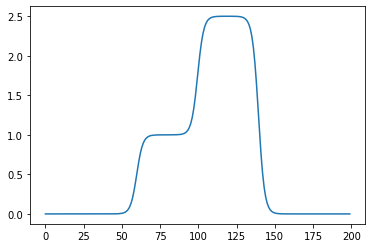

In [581]:
plt.plot(l2(a1(l1(x))).data)

`-` 2개의 시그모이드를 우연히 잘 결합하면 아래와 같은 함수 $h$를 만들 수 있다. 

In [582]:
h = lambda x: torch.sigmoid(200*(x+0.5))+torch.sigmoid(-200*(x-0.5))-1.0

Text(0.5, 1.0, '$h(x)$')

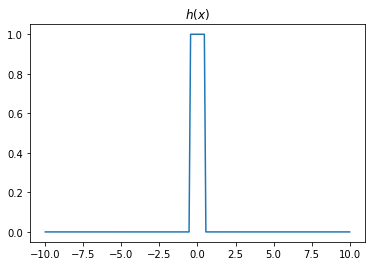

In [583]:
plt.plot(x,h(x))
plt.title("$h(x)$")

`-` 위와 같은 함수 $h$를 활성화함수로 하고 $m$개의 노드를 가지는 은닉층을 생각해보자. 이러한 은닉층을 사용한다면 전체 네트워크를 아래와 같이 표현할 수 있다. 

$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,m)}{\boldsymbol u^{(1)}} \overset{h}{\to} \underset{(n,m)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\hat{\boldsymbol y}}$  

그리고 위의 네트워크와 동일한 효과를 주는 아래의 네트워크가 항상 존재함. 

$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,2m)}{\boldsymbol u^{(1)}} \overset{sig}{\to} \underset{(n,2m)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\hat{\boldsymbol y}}$  

`-` $h(x)$를 활성화함수로 가지는 네트워크를 설계하여 보자. 

In [584]:
class MyActivation(torch.nn.Module): ## 사용자정의 활성화함수를 선언하는 방법
    def __init__(self):
        super().__init__() 
    def forward(self, input):
        return h(input) # activation 의 출력 

In [585]:
a1=MyActivation()
# a1 = torch.nn.Sigmoid(), a1 = torch.nn.ReLU() 대신에 a1 = MyActivation()

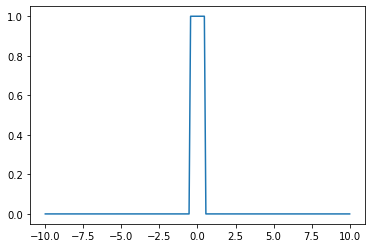

In [586]:
plt.plot(x,a1(x)) 

**히든레이어가 1개의 노드를 가지는 경우**

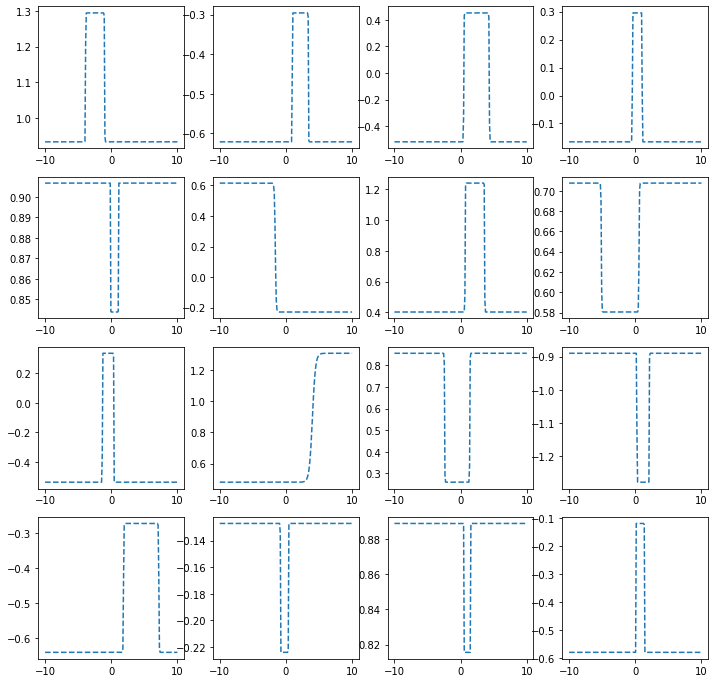

In [587]:
torch.manual_seed(43052)
fig, ax = plt.subplots(4,4,figsize=(12,12))
for i in range(4):
    for j in range(4):
        net = torch.nn.Sequential(
            torch.nn.Linear(1,1),
            MyActivation(),
            torch.nn.Linear(1,1)
        )
        ax[i,j].plot(x,net(x).data,'--')

**히든레이어가 2개의 노드를 가지는 경우**

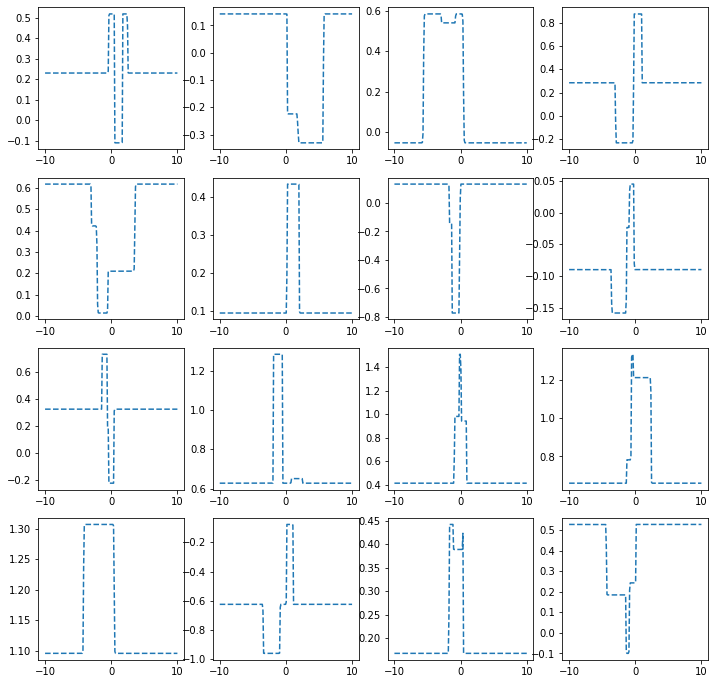

In [588]:
torch.manual_seed(43052)
fig, ax = plt.subplots(4,4,figsize=(12,12))
for i in range(4):
    for j in range(4):
        net = torch.nn.Sequential(
            torch.nn.Linear(1,2),
            MyActivation(),
            torch.nn.Linear(2,1)
        )
        ax[i,j].plot(x,net(x).data,'--')

**히든레이어가 3개의 노드를 가지는 경우**

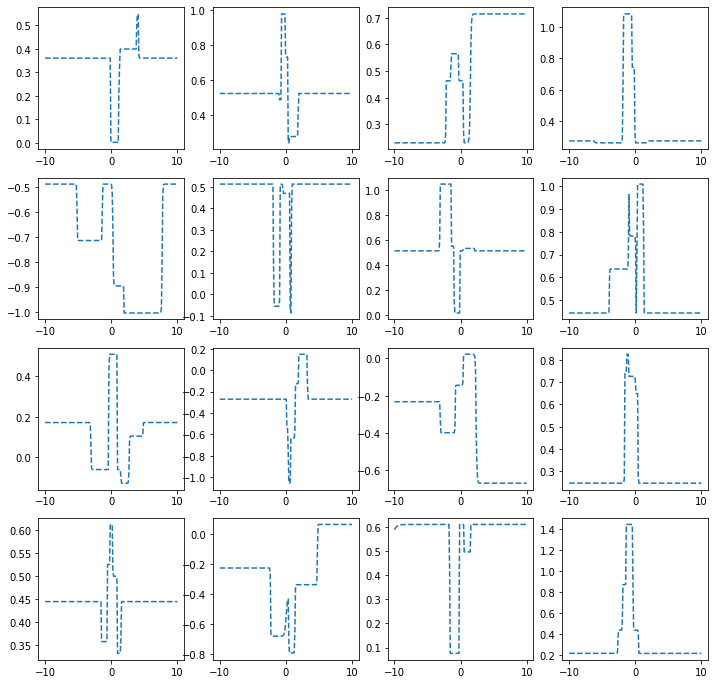

In [589]:
torch.manual_seed(43052)
fig, ax = plt.subplots(4,4,figsize=(12,12))
for i in range(4):
    for j in range(4):
        net = torch.nn.Sequential(
            torch.nn.Linear(1,3),
            MyActivation(),
            torch.nn.Linear(3,1)
        )
        ax[i,j].plot(x,net(x).data,'--')

**히든레이어가 1024개의 노드를 가지는 경우**

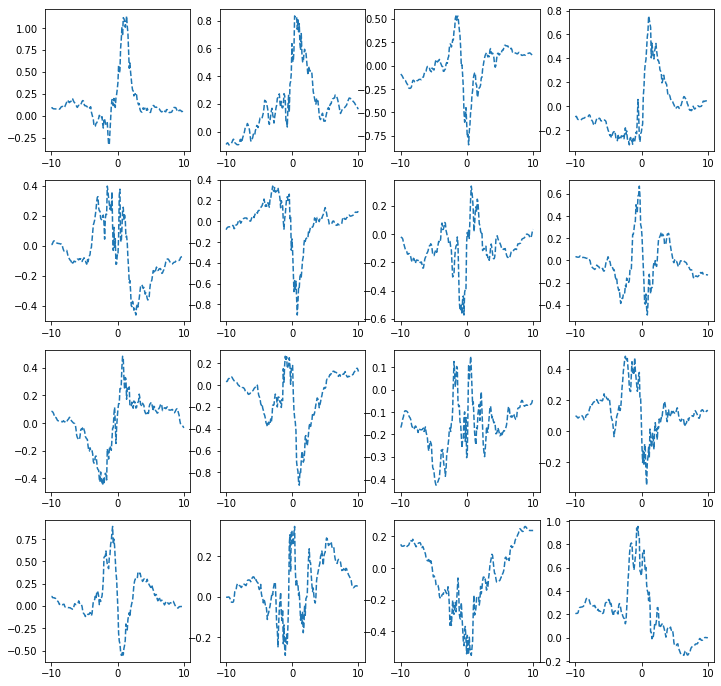

In [590]:
torch.manual_seed(43052)
fig, ax = plt.subplots(4,4,figsize=(12,12))
for i in range(4):
    for j in range(4):
        net = torch.nn.Sequential(
            torch.nn.Linear(1,1024),
            MyActivation(),
            torch.nn.Linear(1024,1)
        )
        ax[i,j].plot(x,net(x).data,'--')

## 시벤코정리 활용 

`-` 아래와 같이 하나의 은닉층을 가지고 있더라도 많은 노드수만 보장되면 매우 충분한 표현력을 가짐 

$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,m)}{\boldsymbol u^{(1)}} \overset{h}{\to} \underset{(n,m)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\hat{\boldsymbol y}}$  

### 예제1 (sin, exp) 

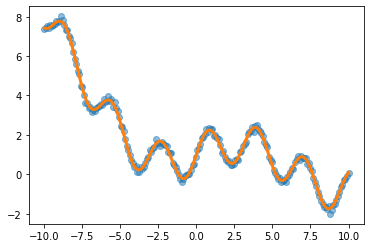

In [444]:
torch.manual_seed(43052)
x = torch.linspace(-10,10,200).reshape(-1,1)
underlying = torch.sin(2*x) + torch.sin(0.5*x) + torch.exp(-0.2*x)
eps = torch.randn(200).reshape(-1,1)*0.1
y = underlying + eps 
plt.plot(x,y,'o',alpha=0.5)
plt.plot(x,underlying,lw=3)

In [445]:
h = lambda x: torch.sigmoid(200*(x+0.5))+torch.sigmoid(-200*(x-0.5))-1.0
class MyActivation(torch.nn.Module): ## 사용자정의 활성화함수를 선언하는 방법
    def __init__(self):
        super().__init__() 
    def forward(self, input):
        return h(input) 

In [446]:
net= torch.nn.Sequential(
    torch.nn.Linear(1,2048),
    MyActivation(),
    torch.nn.Linear(2048,1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters()) 

In [447]:
for epoc in range(200):
    ## 1 
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

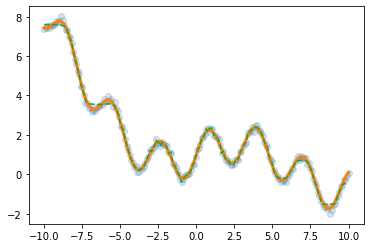

In [448]:
plt.plot(x,y,'o',alpha=0.2)
plt.plot(x,underlying,lw=3)
plt.plot(x,net(x).data,'--')

### 예제2 (스펙높아도 취업X) 

In [449]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-10-04-dnnex0.csv')
df

,x,underlying,y
0,-1.000000,0.000045,0.0
1,-0.998999,0.000046,0.0
2,-0.997999,0.000047,0.0
3,-0.996998,0.000047,0.0
4,-0.995998,0.000048,0.0
...,...,...,...
1995,0.995998,0.505002,0.0
1996,0.996998,0.503752,0.0
1997,0.997999,0.502501,0.0
1998,0.998999,0.501251,1.0


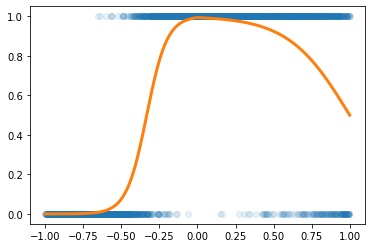

In [450]:
x = torch.tensor(df.x).reshape(-1,1).float()
y = torch.tensor(df.y).reshape(-1,1).float()
plt.plot(x,y,'o',alpha=0.1)
plt.plot(df.x,df.underlying,lw=3)

In [451]:
h = lambda x: torch.sigmoid(200*(x+0.5))+torch.sigmoid(-200*(x-0.5))-1.0
class MyActivation(torch.nn.Module): ## 사용자정의 활성화함수를 선언하는 방법
    def __init__(self):
        super().__init__() 
    def forward(self, input):
        return h(input) 

In [452]:
torch.manual_seed(43052)
net= torch.nn.Sequential(
    torch.nn.Linear(1,2048),
    MyActivation(),
    torch.nn.Linear(2048,1),
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters()) 

In [453]:
for epoc in range(100):
    ## 1 
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

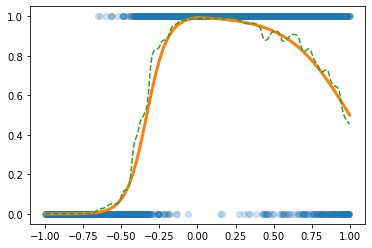

In [454]:
plt.plot(x,y,'o',alpha=0.2)
plt.plot(df.x,df.underlying,lw=3)
plt.plot(x,net(x).data,'--')